In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import json

details = pd.read_json('IMDB_movie_details.json', lines=True)
reviews = pd.read_json('IMDB_reviews.json', lines=True)
data = pd.merge(details, reviews, on='movie_id')
print(data.head())
print(data.info())

    movie_id                                       plot_summary  duration  \
0  tt0105112  Former CIA analyst, Jack Ryan is in England wi...  1h 57min   
1  tt0105112  Former CIA analyst, Jack Ryan is in England wi...  1h 57min   
2  tt0105112  Former CIA analyst, Jack Ryan is in England wi...  1h 57min   
3  tt0105112  Former CIA analyst, Jack Ryan is in England wi...  1h 57min   
4  tt0105112  Former CIA analyst, Jack Ryan is in England wi...  1h 57min   

                genre  rating_x release_date  \
0  [Action, Thriller]       6.9   1992-06-05   
1  [Action, Thriller]       6.9   1992-06-05   
2  [Action, Thriller]       6.9   1992-06-05   
3  [Action, Thriller]       6.9   1992-06-05   
4  [Action, Thriller]       6.9   1992-06-05   

                                       plot_synopsis        review_date  \
0  Jack Ryan (Ford) is on a "working vacation" in...       5 March 2008   
1  Jack Ryan (Ford) is on a "working vacation" in...    15 October 2007   
2  Jack Ryan (Ford) is 

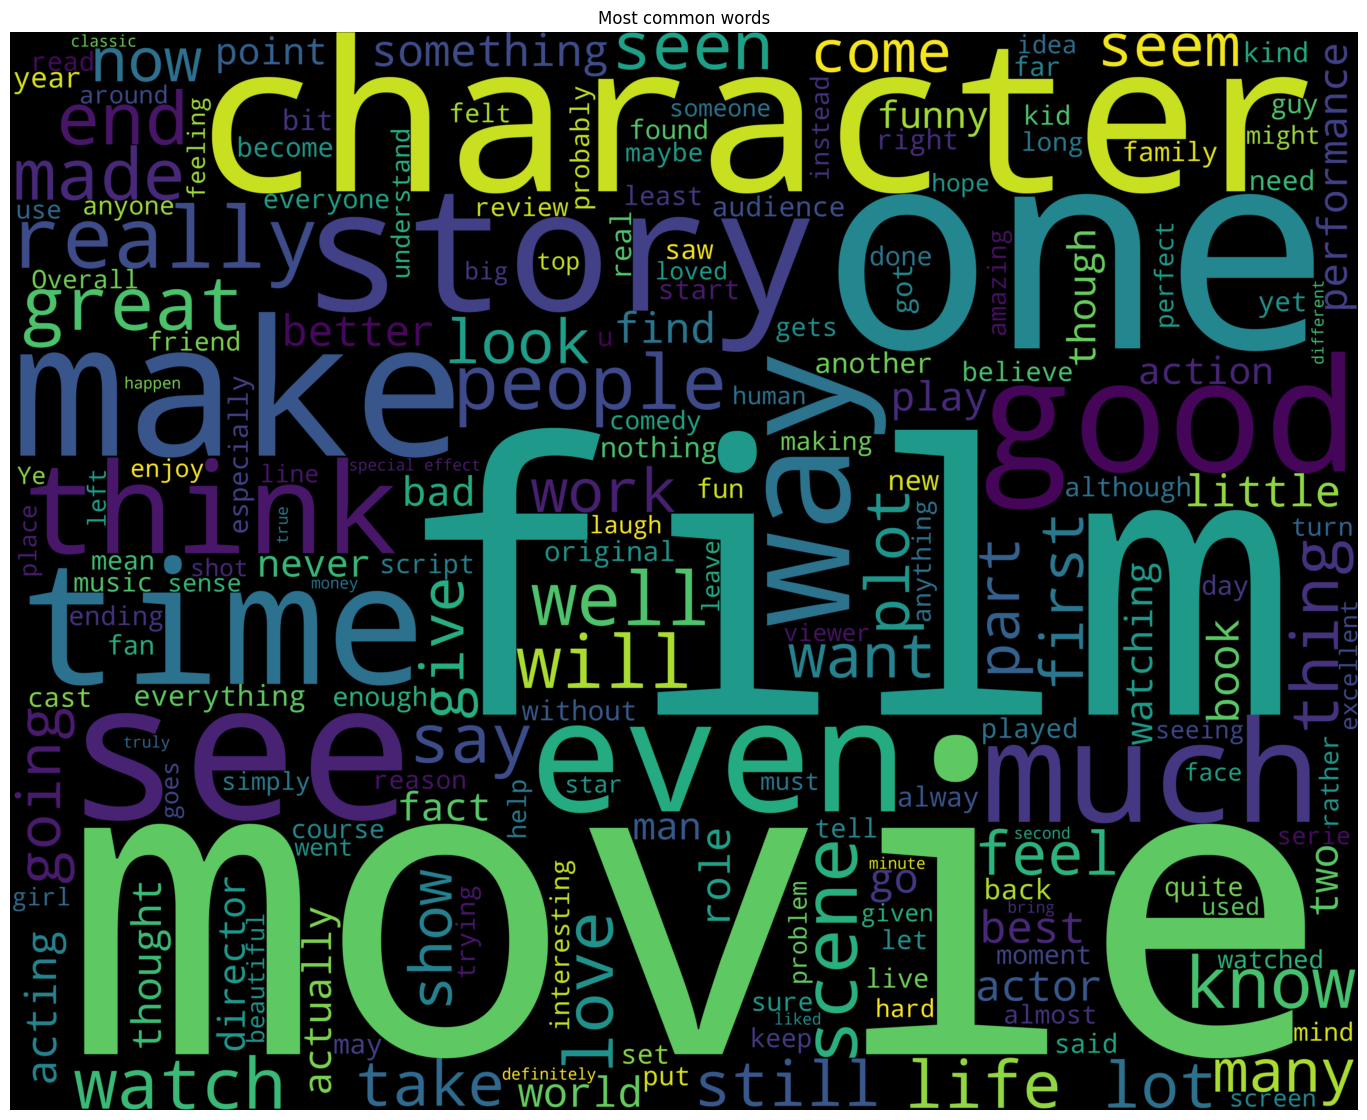

In [ ]:
sample_data = data.sample(20000, random_state=30)
all_reviews = ' '.join(sample_data['review_text'].astype(str))
word_cloud = WordCloud(width=5000, height=4000).generate(all_reviews)
plt.figure(figsize=(20,14))
plt.imshow(word_cloud, interpolation='bilinear')
plt.title('Most common words')
plt.axis('off')
plt.show()

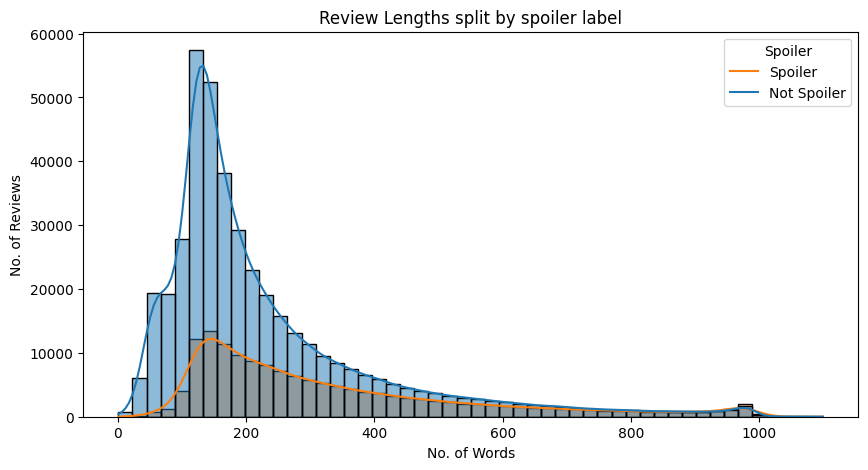

In [24]:
data['word_count'] = data['review_text'].astype(str).apply(lambda x: len(x.split()))
plt.figure(figsize=(10,5))
filtered_data = data[data['word_count']<1100]
sns.histplot(data=filtered_data, x='word_count',bins=50, kde=True, hue='is_spoiler')
plt.title('Review Lengths split by spoiler label')
plt.xlabel('No. of Words')
plt.ylabel('No. of Reviews')
plt.legend(title = 'Spoiler', labels= ['Spoiler','Not Spoiler'])
plt.show()

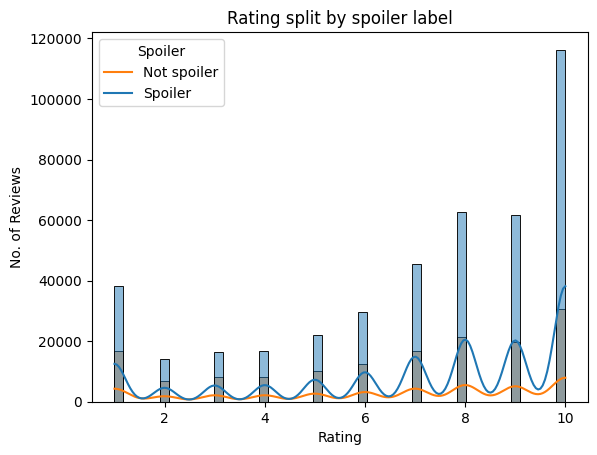

In [25]:
sns.histplot(data= data,x='rating_y', hue='is_spoiler', bins=50, kde=True)
plt.title('Rating split by spoiler label')
plt.xlabel('Rating')
plt.ylabel('No. of Reviews')
plt.legend(title ='Spoiler', labels=['Not spoiler','Spoiler'])
plt.show()